In [28]:
import psycopg2
import pandas as pd
from IPython.display import HTML
import plotly.express as px
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv('Salaries.csv')

C:\Users\HOME\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [7]:
#for i in df.columns:
 #   df[i] = pd.to_numeric(df[i],errors= 'coerce')

In [8]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [9]:
def find_job_title(row): #give credit to MattEvanoff because he made this function
    
    police_title = ['police']
    fire_title = ['fire']
    medical_title = ['medical']
    
    for police in police_title:
        if police in row.lower():
            return 'police'    
    for fire in fire_title:
        if fire in row.lower():
            return 'fire'
    for medical in medical_title:
        if medical in row.lower():
            return 'medical'   
    else:
        return 'other'
    
df['New_JobTitle']= df['JobTitle'].map(find_job_title)

In [10]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,New_JobTitle
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,other
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,police
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,police
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,other
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,fire


In [11]:
df=df[df['EmployeeName']!='Not provided']
df=df[df['New_JobTitle']!='other']
df.reset_index(drop=True,inplace=True)

In [12]:
df.drop(columns=['Notes', 'Agency', 'Id', 'Status', 'JobTitle'], axis=1, inplace=True)

In [13]:
df[df['EmployeeName']=='Not provided'].sum()

EmployeeName        0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
New_JobTitle        0.0
dtype: float64

In [14]:
df

,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,New_JobTitle
0,GARY JIMENEZ,155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,police
1,ALBERT PARDINI,212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,police
2,PATRICK GARDNER,134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,fire
3,ALSON LEE,92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,fire
4,MICHAEL MORRIS,176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,fire
...,...,...,...,...,...,...,...,...,...
15762,Dennis V Cravalho,0.00,0.00,242.66,0.00,242.66,242.66,2014,police
15763,Elizabeth A Maron,0.00,0.00,212.39,0.00,212.39,212.39,2014,police
15764,Patricia O Williams,0.00,0.00,134.78,0.00,134.78,134.78,2014,police
15765,Lawrence F Gatt,73.33,0.00,0.00,0.73,73.33,74.06,2014,fire


In [127]:
df.fillna(0,inplace=True)

In [128]:
df

,EmployeeName,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,New_JobTitle
0,GARY JIMENEZ,155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,police
1,ALBERT PARDINI,212739.13,106088.18,16452.6,0,335279.91,335279.91,2011,police
2,PATRICK GARDNER,134401.6,9737.0,182234.59,0,326373.19,326373.19,2011,fire
3,ALSON LEE,92492.01,89062.9,134426.14,0,315981.05,315981.05,2011,fire
4,MICHAEL MORRIS,176932.64,86362.68,40132.23,0,303427.55,303427.55,2011,fire
...,...,...,...,...,...,...,...,...,...
15762,Dennis V Cravalho,0.00,0.00,242.66,0.00,242.66,242.66,2014,police
15763,Elizabeth A Maron,0.00,0.00,212.39,0.00,212.39,212.39,2014,police
15764,Patricia O Williams,0.00,0.00,134.78,0.00,134.78,134.78,2014,police
15765,Lawrence F Gatt,73.33,0.00,0.00,0.73,73.33,74.06,2014,fire


In [129]:
import sqlite3
conn = sqlite3.connect('database.sqlite')  
c = conn.cursor()

In [ ]:
df.to_sql('job', conn)

In [130]:
c.execute('select year, New_JobTitle, max(BasePay), avg(BasePay)/2, avg(BasePay) from job group by year, New_JobTitle')
rez= c.fetchall()
rez

[(2011, 'fire', '99942.29', 53274.63460589441, 106549.26921178882),
 (2011, 'medical', '9839.72', 28671.122552204193, 57342.24510440839),
 (2011, 'police', '99982.33', 52990.60738654456, 105981.21477308912),
 (2012, 'fire', '99589.68', 54611.32341269835, 109222.6468253967),
 (2012, 'medical', '9851.96', 26921.550496183194, 53843.10099236639),
 (2012, 'police', '99942.41', 48114.503092756655, 96229.00618551331),
 (2013, 'fire', '98731.4', 58079.641636552944, 116159.28327310589),
 (2013, 'medical', '9794.27', 27815.332435294084, 55630.66487058817),
 (2013, 'police', '99287.06', 51202.91825745272, 102405.83651490544),
 (2014, 'fire', '99889.45', 54089.643752481694, 108179.28750496339),
 (2014, 'medical', '9925.80', 28408.249760273924, 56816.49952054785),
 (2014, 'police', '99958.01', 46936.030147291, 93872.060294582)]

In [131]:
first = pd.DataFrame(rez).round(2)
first

,0,1,2,3,4
0,2011,fire,99942.29,53274.63,106549.27
1,2011,medical,9839.72,28671.12,57342.25
2,2011,police,99982.33,52990.61,105981.21
3,2012,fire,99589.68,54611.32,109222.65
4,2012,medical,9851.96,26921.55,53843.10
5,2012,police,99942.41,48114.50,96229.01
6,2013,fire,98731.4,58079.64,116159.28
7,2013,medical,9794.27,27815.33,55630.66
8,2013,police,99287.06,51202.92,102405.84
9,2014,fire,99889.45,54089.64,108179.29


In [132]:
first.columns=['year', 'job', 'max_zp', 'median_zp', 'avg_zp']

In [133]:
first

,year,job,max_zp,median_zp,avg_zp
0,2011,fire,99942.29,53274.63,106549.27
1,2011,medical,9839.72,28671.12,57342.25
2,2011,police,99982.33,52990.61,105981.21
3,2012,fire,99589.68,54611.32,109222.65
4,2012,medical,9851.96,26921.55,53843.10
5,2012,police,99942.41,48114.50,96229.01
6,2013,fire,98731.4,58079.64,116159.28
7,2013,medical,9794.27,27815.33,55630.66
8,2013,police,99287.06,51202.92,102405.84
9,2014,fire,99889.45,54089.64,108179.29


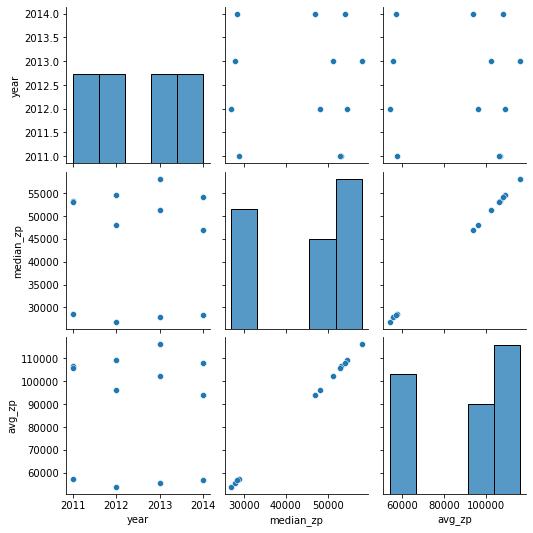

In [134]:
sns.pairplot(first)

In [ ]:
#fire= first.loc[first['job']=='fire']
#fire

In [ ]:
#fire.drop(columns=['job'], inplace=True)

In [ ]:
#fire

In [ ]:
#plt.figure(figsize=(5,3))
#sns.boxplot(x= 'year', y='avg_zp', data=fire)
#plt.show

In [135]:
c.execute('select year, New_JobTitle, sum(BasePay) from job group by year, New_JobTitle')
rez2= c.fetchall()
rez2

[(2011, 'fire', 155455383.77999988),
 (2011, 'medical', 24714507.640000015),
 (2011, 'police', 266224811.50999987),
 (2012, 'fire', 158263615.24999982),
 (2012, 'medical', 21160338.68999999),
 (2012, 'police', 184663462.87000003),
 (2013, 'fire', 167153208.62999937),
 (2013, 'medical', 23643032.56999997),
 (2013, 'police', 188938768.37000054),
 (2014, 'fire', 163458903.4199997),
 (2014, 'medical', 24885626.789999958),
 (2014, 'police', 178450786.6200004)]

In [136]:
second_BasePay=pd.DataFrame(rez2)
second_BasePay

,0,1,2
0,2011,fire,1.554554e+08
1,2011,medical,2.471451e+07
2,2011,police,2.662248e+08
3,2012,fire,1.582636e+08
4,2012,medical,2.116034e+07
5,2012,police,1.846635e+08
6,2013,fire,1.671532e+08
7,2013,medical,2.364303e+07
8,2013,police,1.889388e+08
9,2014,fire,1.634589e+08


In [137]:
second_BasePay.columns=['year', 'work', 'sum(BasePay)']
second_BasePay

,year,work,sum(BasePay)
0,2011,fire,1.554554e+08
1,2011,medical,2.471451e+07
2,2011,police,2.662248e+08
3,2012,fire,1.582636e+08
4,2012,medical,2.116034e+07
5,2012,police,1.846635e+08
6,2013,fire,1.671532e+08
7,2013,medical,2.364303e+07
8,2013,police,1.889388e+08
9,2014,fire,1.634589e+08


<AxesSubplot:xlabel='year', ylabel='sum(BasePay)'>

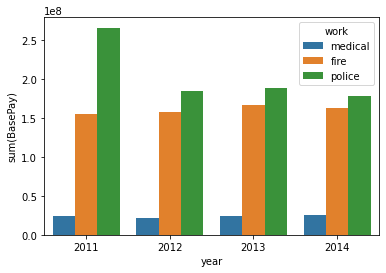

In [138]:
sns.barplot(x='year', y='sum(BasePay)', hue='work', hue_order=['medical', 'fire', 'police'], data=second_BasePay)

In [139]:
c.execute('select year, New_JobTitle, sum(OvertimePay)from job group by year, New_JobTitle')
rez3= c.fetchall()
rez3

[(2011, 'fire', 31898485.779999916),
 (2011, 'medical', 1135499.3799999992),
 (2011, 'police', 22225776.170000024),
 (2012, 'fire', 40499542.119999975),
 (2012, 'medical', 516335.45000000036),
 (2012, 'police', 24739129.820000026),
 (2013, 'fire', 43978891.98999993),
 (2013, 'medical', 520985.7599999998),
 (2013, 'police', 24573767.449999947),
 (2014, 'fire', 38625129.759999976),
 (2014, 'medical', 544616.9700000003),
 (2014, 'police', 26684074.320000045)]

In [140]:
second_OvertimePay=pd.DataFrame(rez3)
second_OvertimePay

,0,1,2
0,2011,fire,31898485.78
1,2011,medical,1135499.38
2,2011,police,22225776.17
3,2012,fire,40499542.12
4,2012,medical,516335.45
5,2012,police,24739129.82
6,2013,fire,43978891.99
7,2013,medical,520985.76
8,2013,police,24573767.45
9,2014,fire,38625129.76


In [141]:
second_OvertimePay.columns=['year', 'work', 'sum(OvertimePay)']
second_OvertimePay

,year,work,sum(OvertimePay)
0,2011,fire,31898485.78
1,2011,medical,1135499.38
2,2011,police,22225776.17
3,2012,fire,40499542.12
4,2012,medical,516335.45
5,2012,police,24739129.82
6,2013,fire,43978891.99
7,2013,medical,520985.76
8,2013,police,24573767.45
9,2014,fire,38625129.76


<AxesSubplot:xlabel='year', ylabel='sum(OvertimePay)'>

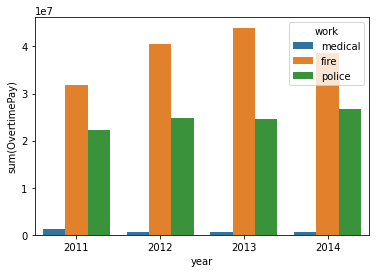

In [142]:
sns.barplot(x='year', y='sum(OvertimePay)', hue='work', hue_order=['medical', 'fire', 'police'], data=second_OvertimePay)

In [143]:
c.execute('select year, New_JobTitle, sum(Benefits) from job group by year, New_JobTitle')
rez4= c.fetchall()
rez4

[(2011, 'fire', None),
 (2011, 'medical', None),
 (2011, 'police', None),
 (2012, 'fire', 52859030.28999997),
 (2012, 'medical', 9703275.839999998),
 (2012, 'police', 57429170.21999992),
 (2013, 'fire', 56620946.75999999),
 (2013, 'medical', 9108516.81999999),
 (2013, 'police', 59201909.1599999),
 (2014, 'fire', 60707949.89000007),
 (2014, 'medical', 10195686.160000002),
 (2014, 'police', 61511276.279999934)]

In [144]:
second_Benefits=pd.DataFrame(rez4)
second_Benefits

,0,1,2
0,2011,fire,NaN
1,2011,medical,NaN
2,2011,police,NaN
3,2012,fire,52859030.29
4,2012,medical,9703275.84
5,2012,police,57429170.22
6,2013,fire,56620946.76
7,2013,medical,9108516.82
8,2013,police,59201909.16
9,2014,fire,60707949.89


In [145]:
second_Benefits.columns=['year', 'work', 'sum(Benefits)']
second_Benefits

,year,work,sum(Benefits)
0,2011,fire,NaN
1,2011,medical,NaN
2,2011,police,NaN
3,2012,fire,52859030.29
4,2012,medical,9703275.84
5,2012,police,57429170.22
6,2013,fire,56620946.76
7,2013,medical,9108516.82
8,2013,police,59201909.16
9,2014,fire,60707949.89


<AxesSubplot:xlabel='year', ylabel='sum(Benefits)'>

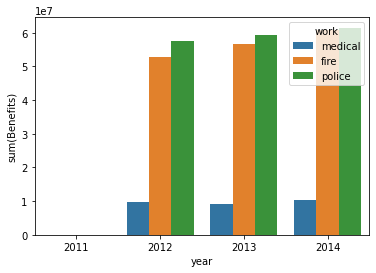

In [146]:
sns.barplot(x='year', y='sum(Benefits)', hue='work', hue_order=['medical', 'fire', 'police'], data=second_Benefits)

In [147]:
c.execute('select year, New_JobTitle, sum(TotalPayBenefits) from job group by year, New_JobTitle')
rez5= c.fetchall()
rez5

[(2011, 'fire', 211563265.9400002),
 (2011, 'medical', 26921486.589999996),
 (2011, 'police', 319268095.2099995),
 (2012, 'fire', 273810371.20999956),
 (2012, 'medical', 31832682.18000003),
 (2012, 'police', 280530623.1400003),
 (2013, 'fire', 291038363.48999995),
 (2013, 'medical', 33782026.899999976),
 (2013, 'police', 288728271.5900011),
 (2014, 'fire', 285536817.2799989),
 (2014, 'medical', 36133544.350000024),
 (2014, 'police', 282011529.0799999)]

In [148]:
third=pd.DataFrame(rez5)
third

,0,1,2
0,2011,fire,2.115633e+08
1,2011,medical,2.692149e+07
2,2011,police,3.192681e+08
3,2012,fire,2.738104e+08
4,2012,medical,3.183268e+07
5,2012,police,2.805306e+08
6,2013,fire,2.910384e+08
7,2013,medical,3.378203e+07
8,2013,police,2.887283e+08
9,2014,fire,2.855368e+08


In [149]:
third.columns=['year', 'work', 'sum(TotalPayBenefits)']
third

,year,work,sum(TotalPayBenefits)
0,2011,fire,2.115633e+08
1,2011,medical,2.692149e+07
2,2011,police,3.192681e+08
3,2012,fire,2.738104e+08
4,2012,medical,3.183268e+07
5,2012,police,2.805306e+08
6,2013,fire,2.910384e+08
7,2013,medical,3.378203e+07
8,2013,police,2.887283e+08
9,2014,fire,2.855368e+08


<AxesSubplot:xlabel='year', ylabel='sum(TotalPayBenefits)'>

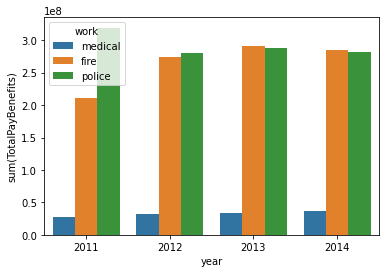

In [150]:
sns.barplot(x='year', y='sum(TotalPayBenefits)', hue='work', hue_order=['medical', 'fire', 'police'], data=third)

In [151]:
c.execute('select year, count(EmployeeName), New_JobTitle from job group by year, New_JobTitle')
rez6= c.fetchall()
rez6

[(2011, 1459, 'fire'),
 (2011, 431, 'medical'),
 (2011, 2512, 'police'),
 (2012, 1449, 'fire'),
 (2012, 393, 'medical'),
 (2012, 1919, 'police'),
 (2013, 1460, 'fire'),
 (2013, 425, 'medical'),
 (2013, 1869, 'police'),
 (2014, 1511, 'fire'),
 (2014, 438, 'medical'),
 (2014, 1901, 'police')]

In [152]:
four=pd.DataFrame(rez6)
four

,0,1,2
0,2011,1459,fire
1,2011,431,medical
2,2011,2512,police
3,2012,1449,fire
4,2012,393,medical
5,2012,1919,police
6,2013,1460,fire
7,2013,425,medical
8,2013,1869,police
9,2014,1511,fire


In [153]:
four.columns=['year', 'people', 'work']
four

,year,people,work
0,2011,1459,fire
1,2011,431,medical
2,2011,2512,police
3,2012,1449,fire
4,2012,393,medical
5,2012,1919,police
6,2013,1460,fire
7,2013,425,medical
8,2013,1869,police
9,2014,1511,fire


<AxesSubplot:xlabel='year', ylabel='people'>

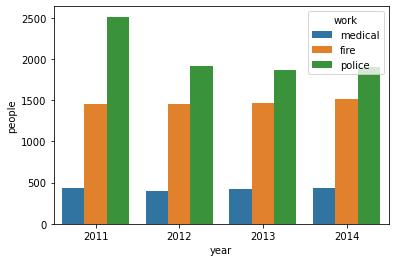

In [154]:
sns.barplot(x='year', y='people', hue='work', hue_order=['medical', 'fire', 'police'], data=four)